## TP3 Regression
### Deadline Monday 17/05/2021 23:59
Optimization method like gradient descent (GD) can be used to minimize the cost function of linear regression.  But for linear regression, there exists an analytical solution. That means we can obtain the variables for linear regression in one step calculation by using the right formula.  In this TP,  you are going to solve the Linear Regression with and without $L2$ regularizer using both the analytical solution and GD.


Before start read carefully the description of the tp (TP3_linear_regression_GD_L2.pdf) and the regression.py python script. You can add the extra functions that are needed here or if you prefere you can create a new python script.

Do not forget to use seed for reproducibility. 


In [1]:
import numpy as np
import pandas as pd
from random import shuffle
from datetime import datetime
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from regression import LinearRegression_RidgeRegression


In [2]:
def train_test_split(X, y, test_size=0.3):
    """ Split the data into train and test sets """

    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

#general functions
def generateMatrix(n=100, d=10):
    np.random.seed(0) #makes answer always the same
    #follows normal distribution : mu=0 sigma=1
    return np.random.normal(0, 1, size=(n, d))

def generateVector(d=10):
    np.random.seed(0) #makes answer always the same
    #follows normal distribution : mu=0 sigma=10
    return np.random.normal(0, 10, size=(d, 1))

def generateYNoise(y):
    return y + np.random.normal(0, 1, size=(y.shape[0], y.shape[1]))

def addFeaturesDependant(X, d=2):
    for i in range(d):
        X = np.append(X, X[:,i].reshape(X.shape[0], 1)/2, axis=1)
    return X

In [3]:
X = generateMatrix() # default size : 100x10
w = generateVector() # default size : 10x1
y = np.dot(X,w)      # default size : 100x1

In [4]:
# analytical solutions

# split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# create model with train data and compute w^
modelAnalyticalSol = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=True)
w_chapeau = modelAnalyticalSol.fit()
# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test = modelAnalyticalSol.predict(X_test)


error_testAnalytical = np.linalg.norm(y_test - y_pred_test, 2)
print("X_test error for analytical solution is : ", error_testAnalytical)

X_test error for analytical solution is :  5.564421850464314e-14


In [5]:
# Gradient descent
preGD = datetime.now()
modelGraDesSol = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=False)

w_chapeau = modelGraDesSol.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test = modelGraDesSol.predict(X_test)
postGD = datetime.now()
error_testGD = np.linalg.norm(y_test - y_pred_test, 2)
print("X_test error for GD solution is : ", error_testGD)

X_test error for GD solution is :  0.0047346922370979545


X_test error for analytical solution is       :  5.564421850464314e-14
lr = 0.0001 : X_test error for GD solution is :  46.85359168297029
lr = 0.001  : X_test error for GD solution is :  0.004959621352855823
lr = 0.01   : X_test error for GD solution is :  8.512620120394656e+16
lr = 0.1    : X_test error for GD solution is :  1.4186212266445061e+138
x   :  [0.0001, 0.001, 0.01, 0.1]
mse :  [109.76295267972512, 1.2298921981851709e-06, 3.623235065707396e+32, 1.0062430923431818e+275]


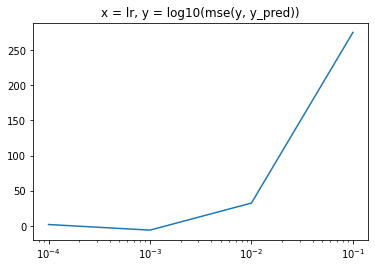

In [6]:
import matplotlib.pyplot as plt
print("X_test error for analytical solution is       : ", error_testAnalytical)

# lr = 0.0001
modelGraDesSol0001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.0001, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol0001.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test0001 = modelGraDesSol0001.predict(X_test)
error_test0001 = np.linalg.norm(y_test - y_pred_test0001, 2)
print("lr = 0.0001 : X_test error for GD solution is : ", error_test0001)

# lr = 0.001
modelGraDesSol001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol001.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test001 = modelGraDesSol001.predict(X_test)
error_test001 = np.linalg.norm(y_test - y_pred_test001, 2)
print("lr = 0.001  : X_test error for GD solution is : ", error_test001)

# lr = 0.01
modelGraDesSol01 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.01, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol01.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test01 = modelGraDesSol01.predict(X_test)
error_test01 = np.linalg.norm(y_test - y_pred_test01, 2)
print("lr = 0.01   : X_test error for GD solution is : ", error_test01)

# lr = 0.1
modelGraDesSol1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.1, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol1.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test1 = modelGraDesSol1.predict(X_test)
error_test1 = np.linalg.norm(y_test - y_pred_test1, 2)
print("lr = 0.1    : X_test error for GD solution is : ", error_test1)

# computing mse
mse0001 = mean_squared_error(y_pred_test0001, y_test)
mse001 = mean_squared_error(y_pred_test001, y_test)
mse01 = mean_squared_error(y_pred_test01, y_test)
mse1 = mean_squared_error(y_pred_test1, y_test)
x = [0.0001,0.001,0.01,0.1]
y_mse = [mse0001, mse001, mse01, mse1]
print("x   : ",x)
print("mse : ",y_mse)
plt.semilogx(x,np.log10(y_mse))
plt.title("x = lr, y = log10(mse(y, y_pred))")
plt.show()


In [7]:
# make new split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test = generateYNoise(y_test) # add noise to y_test

X_test error for analytical solution is       :  3.5069375464947483
lr = 0.0001 : X_test error for GD solution is :  46.51876213512659
lr = 0.001  : X_test error for GD solution is :  3.507183730906596
lr = 0.01   : X_test error for GD solution is :  8.44169422253485e+16
lr = 0.1    : X_test error for GD solution is :  1.4083748899948299e+138
x   :  [0.0001, 0.001, 0.01, 0.1]
mse :  [108.1997615292244, 0.6150168861167955, 3.5631100673389134e+32, 9.917599153839746e+274]


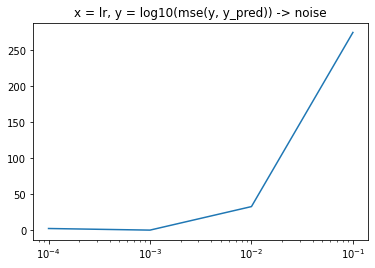

In [8]:
import matplotlib.pyplot as plt

# create model with train data and compute w^
modelAnalyticalSol = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=True)
w_chapeau = modelAnalyticalSol.fit()
# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test = modelAnalyticalSol.predict(X_test)


error_testAnalytical = np.linalg.norm(y_test - y_pred_test, 2)
print("X_test error for analytical solution is       : ", error_testAnalytical)

# lr = 0.0001
modelGraDesSol0001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.0001, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol0001.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test0001 = modelGraDesSol0001.predict(X_test)
error_test0001 = np.linalg.norm(y_test - y_pred_test0001, 2)
print("lr = 0.0001 : X_test error for GD solution is : ", error_test0001)

# lr = 0.001
modelGraDesSol001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol001.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test001 = modelGraDesSol001.predict(X_test)
error_test001 = np.linalg.norm(y_test - y_pred_test001, 2)
print("lr = 0.001  : X_test error for GD solution is : ", error_test001)

# lr = 0.01
modelGraDesSol01 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.01, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol01.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test01 = modelGraDesSol01.predict(X_test)
error_test01 = np.linalg.norm(y_test - y_pred_test01, 2)
print("lr = 0.01   : X_test error for GD solution is : ", error_test01)

# lr = 0.1
modelGraDesSol1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.1, l2_reg = 0, analytical_sol=False)
w_chapeau = modelGraDesSol1.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test1 = modelGraDesSol1.predict(X_test)
error_test1 = np.linalg.norm(y_test - y_pred_test1, 2)
print("lr = 0.1    : X_test error for GD solution is : ", error_test1)

# computing mse
mse0001 = mean_squared_error(y_pred_test0001, y_test)
mse001 = mean_squared_error(y_pred_test001, y_test)
mse01 = mean_squared_error(y_pred_test01, y_test)
mse1 = mean_squared_error(y_pred_test1, y_test)

x = [0.0001,0.001,0.01,0.1]
y_mse = [mse0001, mse001, mse01, mse1]

print("x   : ",x)
print("mse : ",y_mse)
plt.semilogx(x,np.log10(y_mse))
plt.title("x = lr, y = log10(mse(y, y_pred)) -> noise")
plt.show()

In [9]:
X = generateMatrix() # default size : 100x10
X_prime = addFeaturesDependant(X)  # default size : input.shape[0]xinput.shape[1]+2
# adds collums to the end, copying the first collums and dividing by 2, default adds 2 collums
w = generateVector(X_prime.shape[1]) # size : input[1]x1
y_prime = np.dot(X_prime, w)


In [10]:
# analytical solutions

# this computation is impossible, explanation in pdf under linear dependencies section

In [11]:
# Gradient descent

modelGraDesSol = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0, analytical_sol=False)

w_chapeau = modelGraDesSol.fit()

# compute y_pred for X_test, using w_chapeau computed with model.fit()
y_pred_test = modelGraDesSol.predict(X_test)
error_test = np.linalg.norm(y_test - y_pred_test, 2)
print("X_test error for GD solution is : ", error_test)

X_test error for GD solution is :  3.5071776005296686


lambda  =  0.0001  : X_test error for analytical solution is  :  3.5069548003665085
lambda  =  0.001   : X_test error for analytical solution is  :  3.5071111648174598
lambda  =  0.01    : X_test error for analytical solution is  :  3.508781604745622
lambda  =  0.1     : X_test error for analytical solution is  :  3.5360628451781744
lambda  =  1       : X_test error for analytical solution is  :  4.659813210675735
lambda  =  10      : X_test error for analytical solution is  :  25.917370869630428
x   :  [0.0001, 0.001, 0.01, 0.1, 1, 10]
mse :  [0.6149365985906847, 0.6149914361193636, 0.6155774174900632, 0.6251870222524781, 1.0856929579194052, 33.58550563969838]


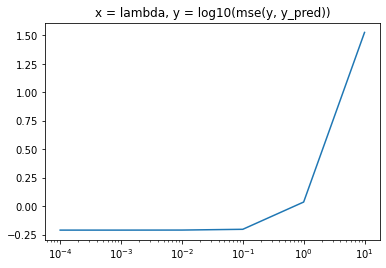

In [12]:
# l2 reg : analytical solution  -> we have already defined X' and y' data

# lambda = 0.0001
modelAnalyticalSol0001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.0001, analytical_sol=True)
modelAnalyticalSol0001.fit()
y_prime_pred_test0001 = modelAnalyticalSol0001.predict(X_test)
error_test0001 = np.linalg.norm(y_test - y_prime_pred_test0001, 2)
print("lambda  = ", 0.0001, " : X_test error for analytical solution is  : ", error_test0001)

# lambda = 0.001
modelAnalyticalSol001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.001, analytical_sol=True)
modelAnalyticalSol001.fit()
y_prime_pred_test001 = modelAnalyticalSol001.predict(X_test)
error_test001 = np.linalg.norm(y_test - y_prime_pred_test001, 2)
print("lambda  = ", 0.001, "  : X_test error for analytical solution is  : ", error_test001)

# lambda = 0.01
modelAnalyticalSol01 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.01, analytical_sol=True)
modelAnalyticalSol01.fit()
y_prime_pred_test01 = modelAnalyticalSol01.predict(X_test)
error_test01 = np.linalg.norm(y_test - y_prime_pred_test01, 2)
print("lambda  = ", 0.01, "   : X_test error for analytical solution is  : ", error_test01)

# lambda = 0.1
modelAnalyticalSol1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.1, analytical_sol=True)
modelAnalyticalSol1.fit()
y_prime_pred_test1 = modelAnalyticalSol1.predict(X_test)
error_test1 = np.linalg.norm(y_test - y_prime_pred_test1, 2)
print("lambda  = ", 0.1, "    : X_test error for analytical solution is  : ", error_test1)

# lambda = 0 -> no point doing this -> same as no regularisation

# lambda = 1
modelAnalyticalSol_1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 1, analytical_sol=True)
modelAnalyticalSol_1.fit()
y_prime_pred_test_1 = modelAnalyticalSol_1.predict(X_test)
error_test_1 = np.linalg.norm(y_test - y_prime_pred_test_1, 2)
print("lambda  = ", 1, "      : X_test error for analytical solution is  : ", error_test_1)

# lambda = 10
modelAnalyticalSol_10 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 10, analytical_sol=True)
modelAnalyticalSol_10.fit()
y_prime_pred_test_10 = modelAnalyticalSol_10.predict(X_test)
error_test_10 = np.linalg.norm(y_test - y_prime_pred_test_10, 2)
print("lambda  = ", 10, "     : X_test error for analytical solution is  : ", error_test_10)

# computing mse
mse0001 = mean_squared_error(y_prime_pred_test0001, y_test)
mse001 = mean_squared_error(y_prime_pred_test001, y_test)
mse01 = mean_squared_error(y_prime_pred_test01, y_test)
mse1 = mean_squared_error(y_prime_pred_test1, y_test)
mse_1 = mean_squared_error(y_prime_pred_test_1, y_test)
mse_10 = mean_squared_error(y_prime_pred_test_10, y_test)

x = [0.0001,0.001,0.01,0.1, 1, 10]
y_mse = [mse0001, mse001, mse01, mse1, mse_1, mse_10]
print("x   : ",x)
print("mse : ",y_mse)
plt.semilogx(x,np.log10(y_mse))
plt.title("x = lambda, y = log10(mse(y, y_pred))")
plt.show()

lambda  =  0.0001  : X_test error for analytical solution is  :  3.5365279522781976
lambda  =  0.001   : X_test error for analytical solution is  :  4.66141601576138
lambda  =  0.01    : X_test error for analytical solution is  :  25.917612277734147
lambda  =  0.1     : X_test error for analytical solution is  :  123.78042656931505
lambda  =  1       : X_test error for analytical solution is  :  10589278029.359774
lambda  =  10      : X_test error for analytical solution is  :  5.828591415254092e+128
x   :  [0.0001, 0.001, 0.01, 0.1, 1, 10]
mse :  [0.625351497862251, 1.0864399635998347, 33.58613130894779, 766.0797000840798, 5.606640459154079e+18, 1.698623894298684e+256]


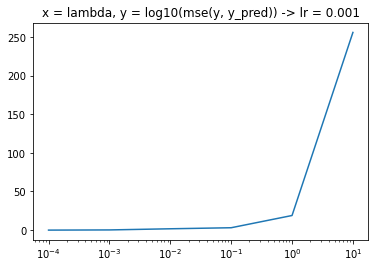

In [13]:
# l2 reg : Gradient descent  -> we have already defined X' and y' data
# lr will be = 0.001 -> which gave the best results previously

# lambda = 0.0001
modelAnalyticalSol0001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.0001, analytical_sol=False)
modelAnalyticalSol0001.fit()
y_prime_pred_test0001 = modelAnalyticalSol0001.predict(X_test)
error_test0001 = np.linalg.norm(y_test - y_prime_pred_test0001, 2)
print("lambda  = ", 0.0001, " : X_test error for analytical solution is  : ", error_test0001)

# lambda = 0.001
modelAnalyticalSol001 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.001, analytical_sol=False)
modelAnalyticalSol001.fit()
y_prime_pred_test001 = modelAnalyticalSol001.predict(X_test)
error_test001 = np.linalg.norm(y_test - y_prime_pred_test001, 2)
print("lambda  = ", 0.001, "  : X_test error for analytical solution is  : ", error_test001)

# lambda = 0.01
modelAnalyticalSol01 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.01, analytical_sol=False)
modelAnalyticalSol01.fit()
y_prime_pred_test01 = modelAnalyticalSol01.predict(X_test)
error_test01 = np.linalg.norm(y_test - y_prime_pred_test01, 2)
print("lambda  = ", 0.01, "   : X_test error for analytical solution is  : ", error_test01)

# lambda = 0.1
modelAnalyticalSol1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 0.1, analytical_sol=False)
modelAnalyticalSol1.fit()
y_prime_pred_test1 = modelAnalyticalSol1.predict(X_test)
error_test1 = np.linalg.norm(y_test - y_prime_pred_test1, 2)
print("lambda  = ", 0.1, "    : X_test error for analytical solution is  : ", error_test1)

# lambda = 0 -> no point doing this -> same as no regularisation

# lambda = 1
modelAnalyticalSol_1 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 1, analytical_sol=False)
modelAnalyticalSol_1.fit()
y_prime_pred_test_1 = modelAnalyticalSol_1.predict(X_test)
error_test_1 = np.linalg.norm(y_test - y_prime_pred_test_1, 2)
print("lambda  = ", 1, "      : X_test error for analytical solution is  : ", error_test_1)

# lambda = 10
modelAnalyticalSol_10 = LinearRegression_RidgeRegression(X_train, y_train, iterations=100, lr=0.001, l2_reg = 10, analytical_sol=False)
modelAnalyticalSol_10.fit()
y_prime_pred_test_10 = modelAnalyticalSol_10.predict(X_test)
error_test_10 = np.linalg.norm(y_test - y_prime_pred_test_10, 2)
print("lambda  = ", 10, "     : X_test error for analytical solution is  : ", error_test_10)

# computing mse
mse0001 = mean_squared_error(y_prime_pred_test0001, y_test)
mse001 = mean_squared_error(y_prime_pred_test001, y_test)
mse01 = mean_squared_error(y_prime_pred_test01, y_test)
mse1 = mean_squared_error(y_prime_pred_test1, y_test)
mse_1 = mean_squared_error(y_prime_pred_test_1, y_test)
mse_10 = mean_squared_error(y_prime_pred_test_10, y_test)

x = [0.0001,0.001,0.01,0.1, 1, 10]
y_mse = [mse0001, mse001, mse01, mse1, mse_1, mse_10]
print("x   : ",x)
print("mse : ",y_mse)
plt.semilogx(x,np.log10(y_mse))
plt.title("x = lambda, y = log10(mse(y, y_pred)) -> lr = 0.001")
plt.show()